In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import scipy.special as spec
import pylab as py

In [2]:
#from 3.4, percent change function
def pct_chg_calc(df,colname):
    #takes the dataset and the respective column and calculates the difference between two adjacent rows and divides by the previous
    return df[colname].diff()/df[colname].shift()

In [30]:
#from 3.4, apply percent change function to each row of each column and name new columns accordingly
def norm_df(df):
    #create new dataframe to store results
    normdf = pd.DataFrame()
    #take the date column from the original
    normdf[df.columns[0]] = df[df.columns[0]].copy()
    #loop through each column with the percent change function defined above
    for column in df.columns[1:]:
        newcol = "{}_per_change".format(column)
        normdf[newcol] = pct_chg_calc(df,column)
        #delete first row in results dataframe as there is no previous value to calculate a percent change frome
        normdf = normdf.iloc[1:]
    return normdf

In [31]:
#read in data
df = pd.read_csv('3.2_linear_interpolation.csv')
df['DATE']= pd.to_datetime(df['DATE'])
#normalize values
normdf = norm_df(df)

In [89]:
def plt_qq(dfcol):
    #calculate the mean to standardize the df column
    mn = dfcol.to_numpy().mean()
    
    #calculate the standard deviation to standardize the df column
    sdv = dfcol.to_numpy().std()
    
    #Standardize the data the data
    sample = (dfcol - mn) / sdv
    
    #get percentiles to calculate to calculate inverse of standard normal percentiles
    pctiles = (dfcol.reset_index().index + 1)/len(dfcol)

    #calculate theoretical quantiles
    theortical = spec.ndtri(pctiles)

    #Create the plot
    plt.plot(theortical, theortical, c = 'purple')
    plt.scatter(theortical, sample, alpha=1)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('QQ-Plot')
    plt.savefig("5_3_3_{}_plot.jpg".format(dfcol.name))
    plt.show()

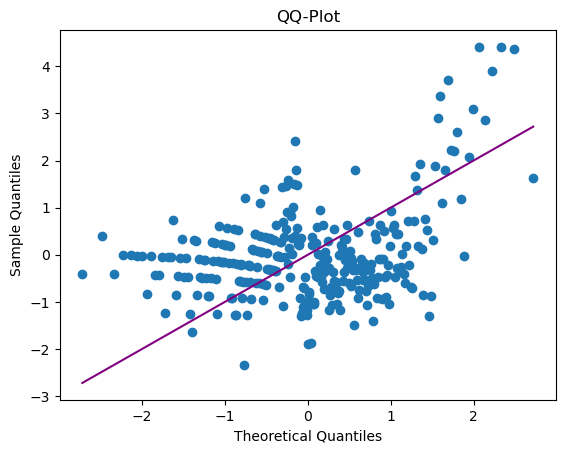

In [90]:
plt_qq(normdf['CPI_Energy_per_change'])

In [18]:
stats.shapiro(normdf['CPI_Energy_per_change'].to_numpy())
#Based on the qq plot, the sample quantiles look nothing like the theoretical samples
#Based on the Shapiro Wilks test, the p-value is extremely small so we can reject the null hypothesis that the data were drawn from a normal distribution 

ShapiroResult(statistic=0.8739230632781982, pvalue=3.599787111327685e-15)

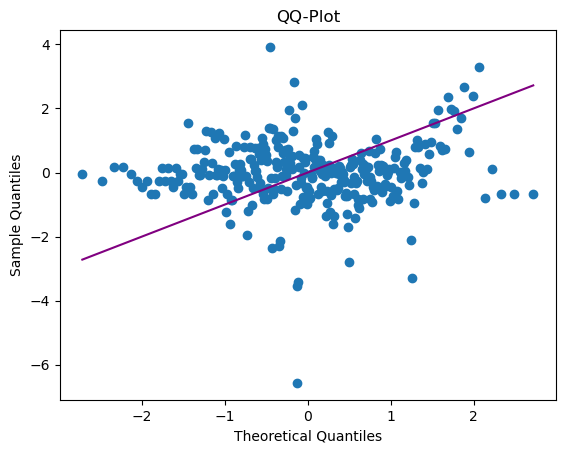

In [91]:
plt_qq(normdf['CPI_all_items_per_change'])

In [17]:
stats.shapiro(normdf['CPI_all_items_per_change'].to_numpy())
#Very similar to the other column
#Based on the qq plot, the sample quantiles look nothing like the theoretical samples
#Based on the Shapiro Wilks test, the p-value is extremely small so we can reject the null hypothesis that the data were drawn from a normal distribution 

ShapiroResult(statistic=0.9091153144836426, pvalue=1.1764626816138102e-12)